In [143]:
## Step 1: Raw data collection &
## Install Required Libraries (if not installed)
!pip install numpy pandas matplotlib seaborn scikit-learn xgboost

In [144]:
## Step 2: Import Required Libraries

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [146]:
## Step 3: Import the dataset using pandas 

df = pd.read_csv("Dentistry Dataset.csv")  

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [147]:
## Step 4:   Data Preprocessing

# i) Identify and handle missing values

df.isnull().sum()

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

In [148]:
# Drop unnecessary columns
df.drop(columns=["Sample ID", "Sl No"], inplace=True)

# Encode categorical variable (Gender)
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])  # Male → 1, Female → 0

# Drop highly correlated features
drop_features = ["right canine width casts", "left canine width casts", "right canine index casts", "left canine index casts"]
df.drop(columns=drop_features, inplace=True)


# Normalize independent variables
X = df.drop(columns=["Gender"])
y = df["Gender"]

normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)
X = pd.DataFrame(X_normalized, columns=X.columns)

# Splitting into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display updated dataset info
df.head()


,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,left canine width intraoral,right canine index intra oral,left canine index intraoral
0,24,0,25.06,25.05,6.08,6.09,0.242,0.242
1,22,0,25.78,25.79,6.13,6.33,0.237,0.247
2,23,0,23.83,23.83,5.91,6.28,0.248,0.264
3,20,0,26.12,26.12,6.08,6.56,0.232,0.250
4,20,0,26.36,26.41,6.09,6.50,0.231,0.246


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1100 non-null   int64  
 1   Gender                           1100 non-null   int32  
 2   inter canine distance intraoral  1100 non-null   float64
 3   intercanine distance casts       1100 non-null   float64
 4   right canine width intraoral     1100 non-null   float64
 5   left canine width intraoral      1100 non-null   float64
 6   right canine index intra oral    1100 non-null   float64
 7   left canine index intraoral      1100 non-null   float64
dtypes: float64(6), int32(1), int64(1)
memory usage: 64.6 KB


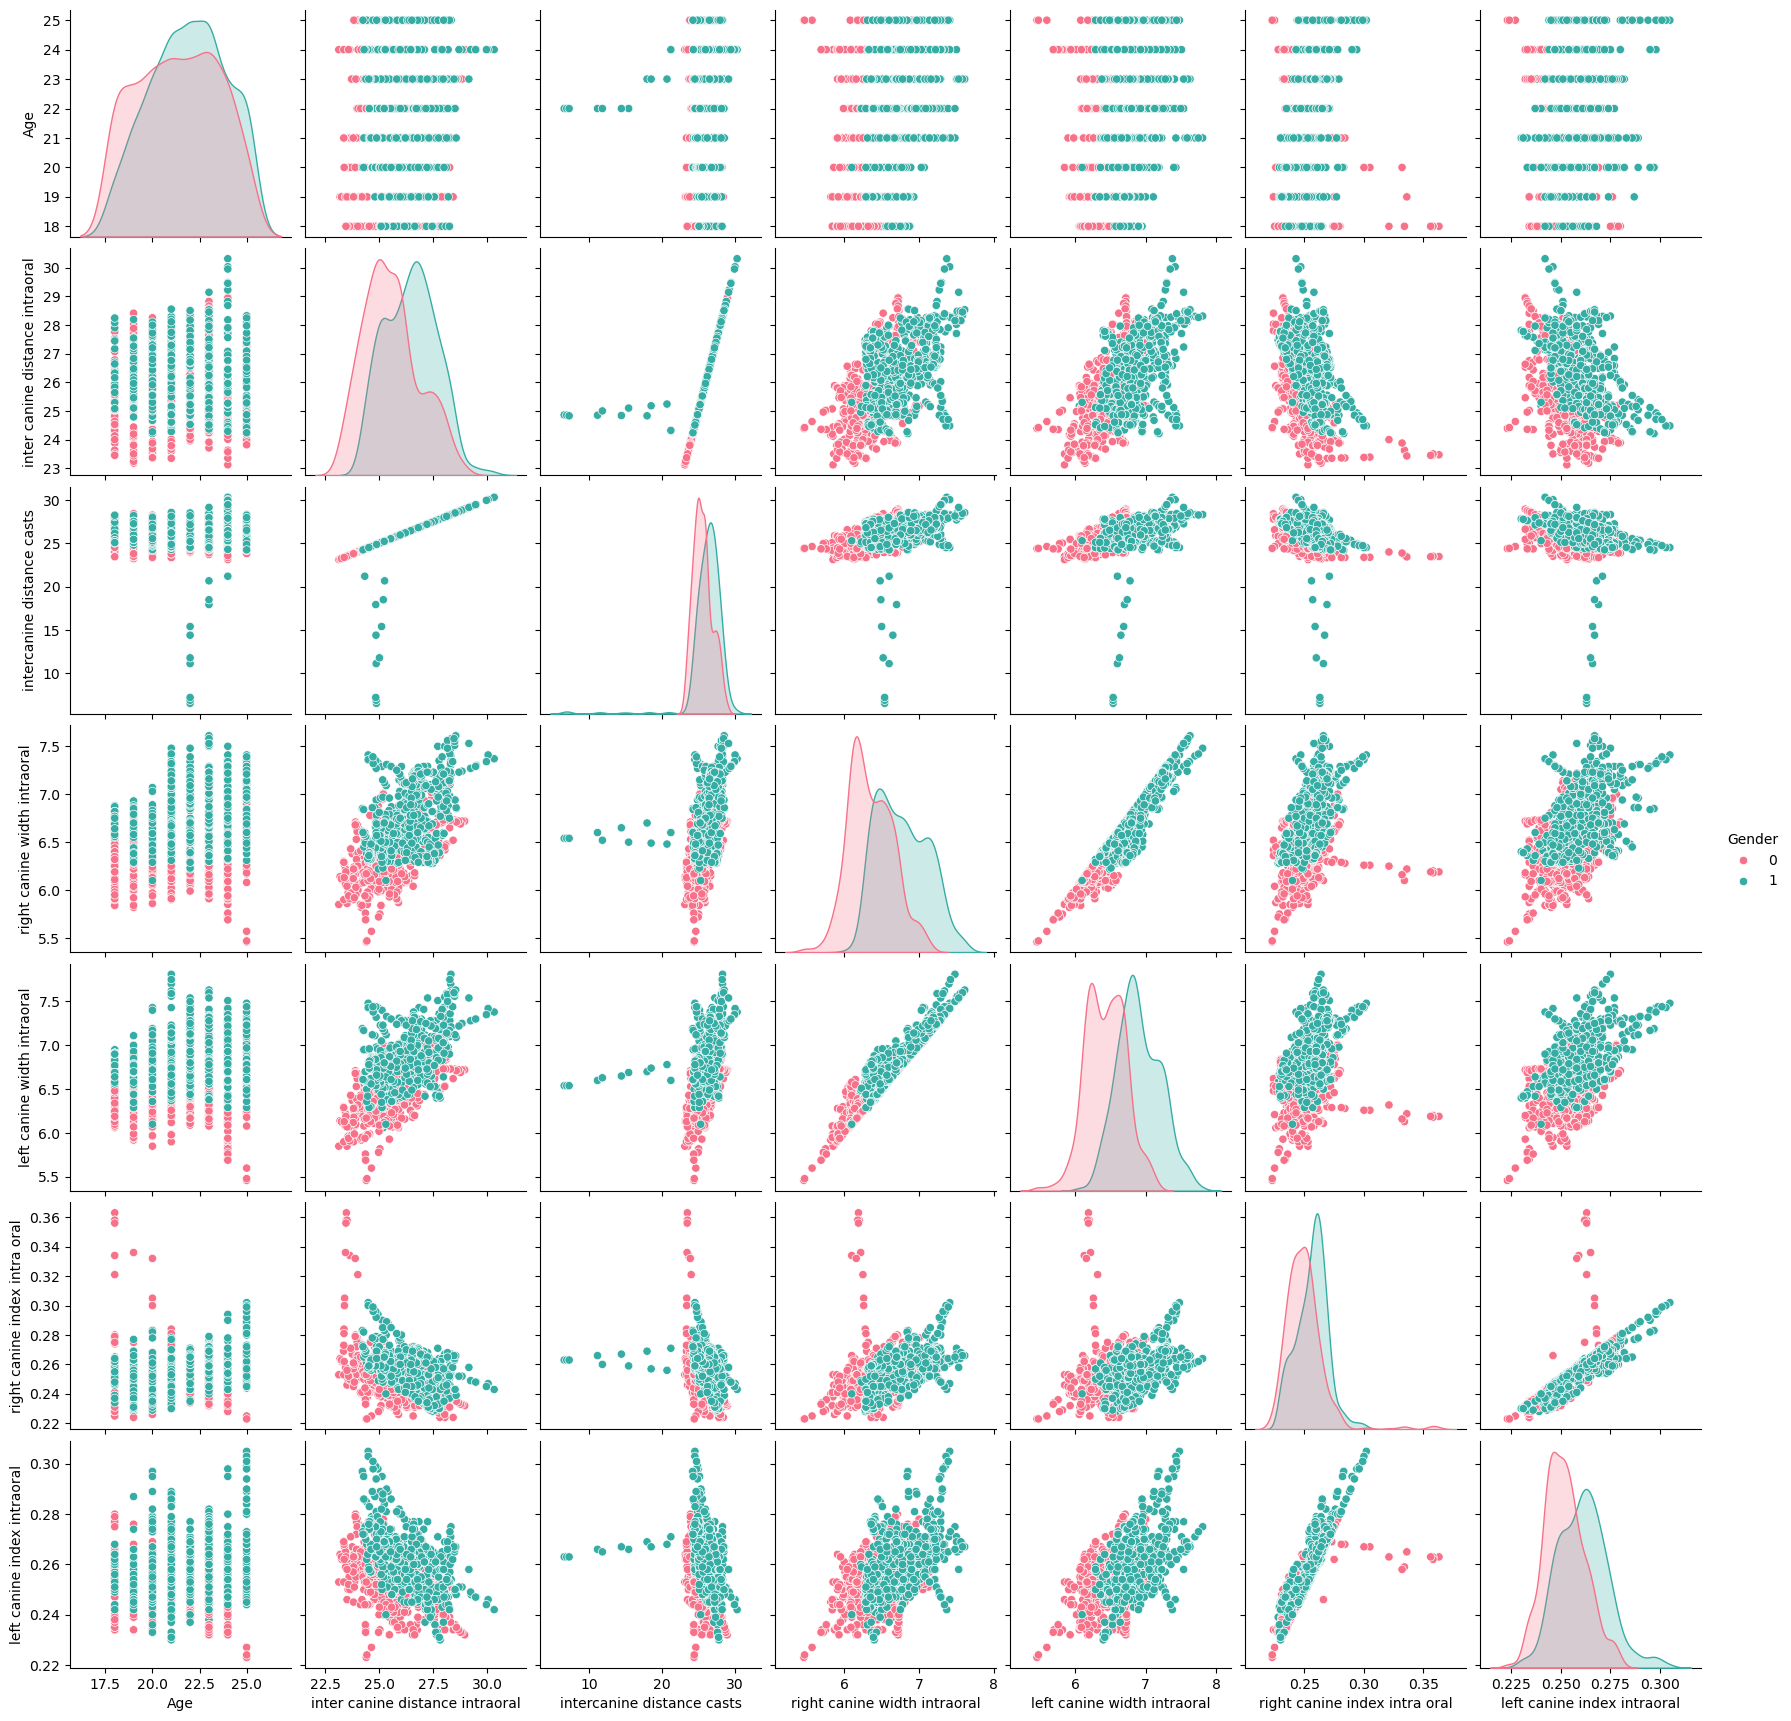

In [150]:
sns.pairplot(df, hue="Gender",palette="husl")
plt.show()

In [151]:
 # ii) Encoding categorical data 


# Labelencoding 
gender_labencoding = LabelEncoder()
df["Gender"] = gender_labencoding.fit_transform(df["Gender"])
df

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,left canine width intraoral,right canine index intra oral,left canine index intraoral
0,24,0,25.06,25.05,6.08,6.09,0.242,0.242
1,22,0,25.78,25.79,6.13,6.33,0.237,0.247
2,23,0,23.83,23.83,5.91,6.28,0.248,0.264
3,20,0,26.12,26.12,6.08,6.56,0.232,0.250
4,20,0,26.36,26.41,6.09,6.50,0.231,0.246
...,...,...,...,...,...,...,...,...
1095,24,1,24.29,24.29,6.58,6.60,0.271,0.272
1096,22,1,25.22,25.22,6.70,6.80,0.265,0.269
1097,25,1,24.24,24.24,6.60,6.61,0.272,0.272
1098,21,1,24.87,24.87,6.57,6.66,0.264,0.267


In [152]:
df.head()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,left canine width intraoral,right canine index intra oral,left canine index intraoral
0,24,0,25.06,25.05,6.08,6.09,0.242,0.242
1,22,0,25.78,25.79,6.13,6.33,0.237,0.247
2,23,0,23.83,23.83,5.91,6.28,0.248,0.264
3,20,0,26.12,26.12,6.08,6.56,0.232,0.250
4,20,0,26.36,26.41,6.09,6.50,0.231,0.246


In [153]:

# iii)   Split independent and dependent variables i.e. X and Y


X=df.drop(["Gender"],axis=1)
Y=df["Gender"]

In [154]:
# iv)   Normalize the X variable      

normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)
X = pd.DataFrame(normalizer.fit_transform(X), columns = X.columns)

In [155]:
X

,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,left canine width intraoral,right canine index intra oral,left canine index intraoral
0,0.549777,0.574059,0.573830,0.139277,0.139506,0.005544,0.005544
1,0.505848,0.592762,0.592992,0.140948,0.145546,0.005449,0.005679
2,0.551504,0.571406,0.571406,0.141713,0.150585,0.005947,0.006330
3,0.465668,0.608162,0.608162,0.141563,0.152739,0.005402,0.005821
4,0.462276,0.609280,0.610436,0.140763,0.150240,0.005339,0.005686
...,...,...,...,...,...,...,...
1095,0.559046,0.565801,0.565801,0.153272,0.153738,0.006313,0.006336
1096,0.511854,0.586770,0.586770,0.155883,0.158209,0.006166,0.006259
1097,0.575427,0.557934,0.557934,0.151913,0.152143,0.006261,0.006261
1098,0.499760,0.591859,0.591859,0.156353,0.158495,0.006283,0.006354


In [156]:
## Step 5: Exploratory Data Analysis (EDA)

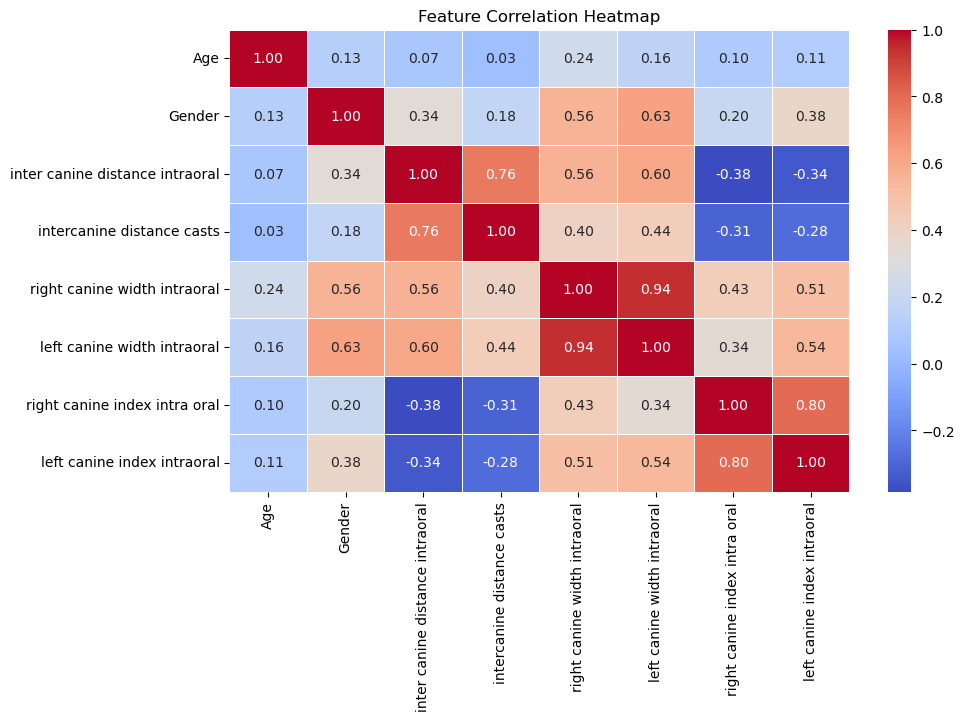

In [157]:
# Correlation Heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [158]:
## Step 6: Model Building 
#Train Logistic Regression, Decision Tree, Random Forest, and XGBoost models: 

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Train models and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.75      0.45      0.56       113
           1       0.59      0.84      0.69       107

    accuracy                           0.64       220
   macro avg       0.67      0.65      0.63       220
weighted avg       0.67      0.64      0.63       220

Model: Decision Tree
Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       113
           1       0.85      0.91      0.88       107

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220

Model: Random Forest
Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       113
           1       0.90      0.88      0.89       107

    accuracy                           0.90       220
   macro avg  

In [159]:
## Step 7: Model Evaluation

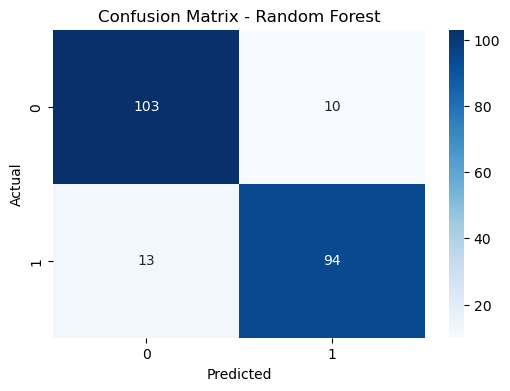

In [160]:
# Confusion Matrix

cm = confusion_matrix(y_test, models["Random Forest"].predict(X_test))

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


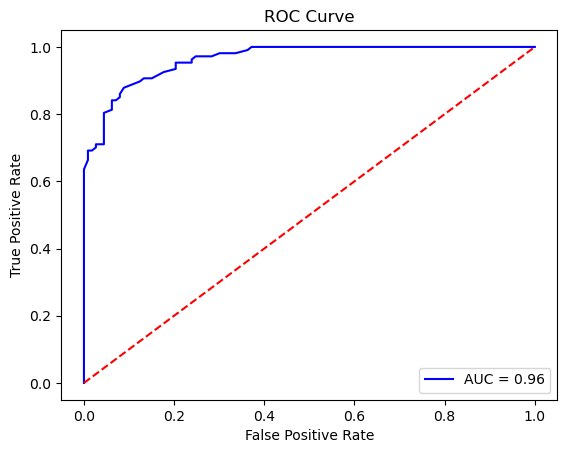

In [161]:
# ROC-AUC Curve

y_pred_prob = models["Random Forest"].predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [162]:
##  Step 8: Save the Results for Documentation

In [163]:
df_results = pd.DataFrame({"Model": list(models.keys()), "Accuracy": [accuracy_score(y_test, models[m].predict(X_test)) for m in models]})
df_results.to_csv("model_results.csv", index=False)
print("Results saved as model_results.csv")

Results saved as model_results.csv
